# a)

In [ ]:
Pkg.add("PyPlot")

In [ ]:
using PyPlot

In [ ]:
#Pkg.update()

Suppose we have a sinusoid function

In [257]:
f(x) = 10*sin(x)

f (generic function with 1 method)

Any) in module Main at In[2]:1 overwritten at In[257]:1.


Our dataset $\mathcal D$ will consist of seven datapoints drawn from the following probabilistic model. 

For each datapoint we randomly draw $x_i$ uniformly in [0,6] and observe a noisy $y_i=f(x_i)+\epsilon_i$, where $\epsilon_i$ is some noise drawn from a standard normal distribution $\mathcal N(0,1)$.

Generate a sample dataset from this distribution.

In [ ]:
#using StatsBase

In [258]:
n = 7
D = Array{Float64}(n, 2) # size n by 2
srand(3)
x = 6*rand(n) # n by 1
y = f(x) + randn(n) # n by 1
D = [x y]

7×2 Array{Float64,2}:
 4.87019   -9.87773 
 5.93059   -2.44452 
 4.84573   -9.06701 
 5.82055   -3.30505 
 0.840367   6.97372 
 3.05666    0.603666
 0.352184   3.52136 

Plot the dataset $\mathcal D$ and the true function $f(x)$.

In [259]:
"""plot function y=f(x)"""
function plotfunc(f;
    _color="black", xmin=0,xmax=6,nsamples=1000)
    xsamples = linspace(xmin,xmax,nsamples)
    plot(xsamples, [f(x) for x in xsamples], color=_color)
end

plotfunc

# b)

Fit a linear model to $\mathcal D$

In [260]:
X = [ones(length(x))  x]
Y = y
w = X\Y #   5.74879 -2.0935
@show w

w = [5.74879,-2.0935]


2-element Array{Float64,1}:
  5.74879
 -2.0935 

Plot the linear model $l(x)$ together with $\mathcal D$ and $f(x)$. Feel free to use our method $\verb|plotfunc(f)|$.

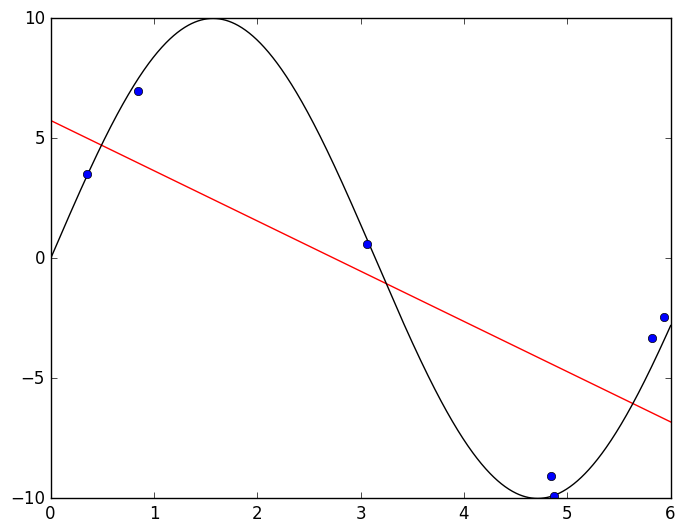

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000002F279C50>

) in module Main at In[6]:1 overwritten at In[261]:1.


In [261]:
l(x) = w[1] + w[2]*x

plotfunc(x->l(x),_color = "red")
plotfunc(x->f(x))
plot(x,y,"o")

# c)

Fit a cubic model $c(x)$ to $\mathcal D$

In [262]:
X = [ones(length(x))  x x.^2 x.^3]
Y = y
w = X\Y # -2.1586   17.915   -8.35826  0.899461

4-element Array{Float64,1}:
 -2.1586  
 17.915   
 -8.35826 
  0.899461

Plot the cubic model with $\mathcal D$ and $f(x)$

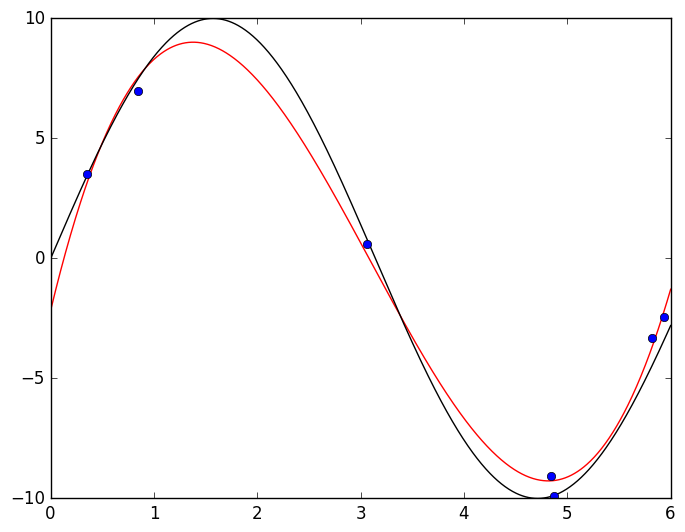

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000002F207DD8>

.


In [263]:
c(x) = w[1] + w[2]*x + w[3]*x^2 + w[4]* x^3
plotfunc(x->c(x), _color= "red")
plotfunc(x->f(x))
plot(x,y,"o")

# d)

Repat the parts (b) and (c) for 1000 different sets $\mathcal D$. Compute $\bar{l}$ and $\bar{c}$, the average linear and average cubic models.

In [264]:
srand(3)
num_samples = 1000
l_w = zeros(num_samples,2)
c_w = zeros(num_samples,4)


1000×4 Array{Float64,2}:
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 ⋮                 
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

In [265]:
srand(2)
for i in 1:num_samples
    x = 6*rand(n) # n by 1
    y = f(x) + randn(n) # n by 1
    # linear
    X = [ones(length(x))  x]
    Y = y
    w = X\Y
    l_w[i,:]=w
    
    # cubic
    X2 = [ones(length(x)) x x.^2 x.^3]
    w2 = X2\Y
   
    c_w[i,:]=w2
    
end
l_avg_w1 = mean(l_w,1)[1]
l_avg_w2 = mean(l_w,1)[2]
@show l_avg_w1 l_avg_w2 
l_avg(x) = l_avg_w1+ l_avg_w2*x


c_avg_w1 = mean(c_w,1)[1]
c_avg_w2 = mean(c_w,1)[2]
c_avg_w3 = mean(c_w,1)[3]
c_avg_w4 = mean(c_w,1)[4]
@show c_avg_w1 c_avg_w2 c_avg_w3 c_avg_w4 

c_avg(x) = c_avg_w1 + c_avg_w2*x+ c_avg_w3 * x.^2 + c_avg_w4 * x.^3

l_avg_w1 = 11.354447413681134
l_avg_w2 = -3.7097747322272467
c_avg_w1 = -1.4457781136375654
c_avg_w2 = 20.186728586195922
c_avg_w3 = -9.413510409424337
c_avg_w4 = 1.0019677241878022


c_avg (generic function with 1 method)

(Any) in module Main at In[163]:38 overwritten at In[265]:30.


Plot $\bar{l}$ together with $f(x)$.

In [ ]:
size(x)

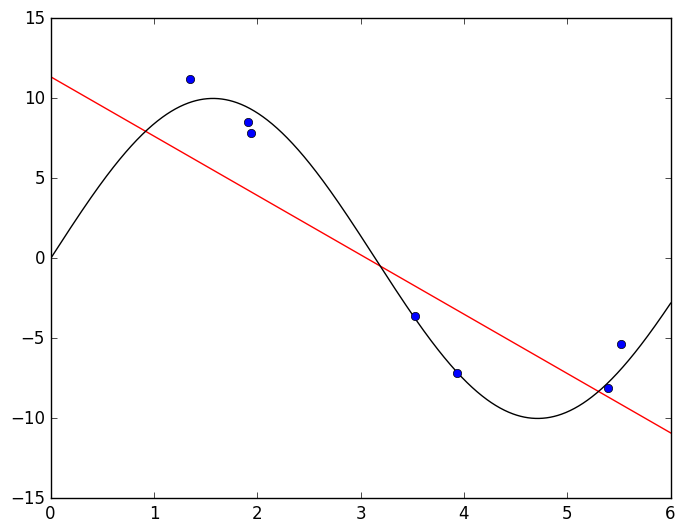

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000002F240EF0>

In [266]:
plotfunc(x->l_avg(x), _color="red")
plotfunc(x->f(x))
plot(x,y,"o")

Plot $\bar{c}(x)$ together with $f(x)$.

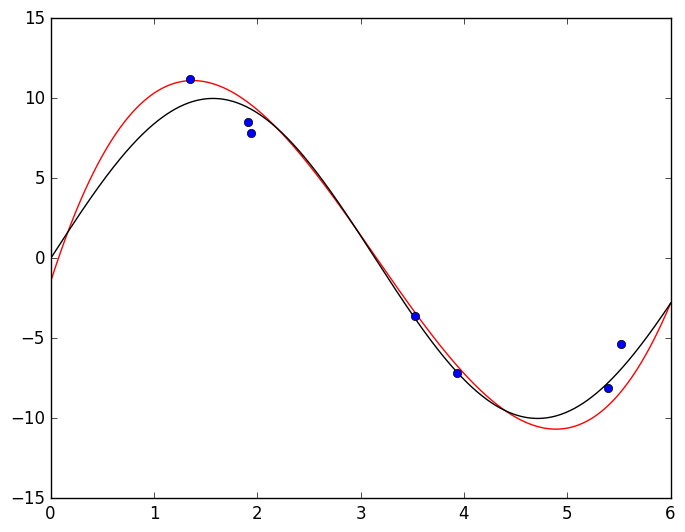

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000002FAABA90>

In [267]:
plotfunc(x->c_avg(x),_color = "red")
plotfunc(x->f(x))
plot(x,y,"o")


# e)

Compute the bias of $\bar{l}$. You can use our integrate function.

In [268]:
function integrate(f, a, b)
    n = 1000
    delta = (b - a)/n;		   ## nothing to change below here
    xs = a + (0:n-1) * delta;          ## n, right is 1:n * delta 

    fx = Float64[]
    for element in xs
        push!(fx,f(element))
    end

    return sum(fx) * delta
end

integrate (generic function with 1 method)

Any, Any, Any) in module Main at In[252]:2 overwritten at In[268]:2.


We can interpret the bias as how far off our averaged model is from the true function. One way to visually see this is by plotting $\bar{l}(x)$ with $f(x)$ and color in their difference. Try out the plotting function below.

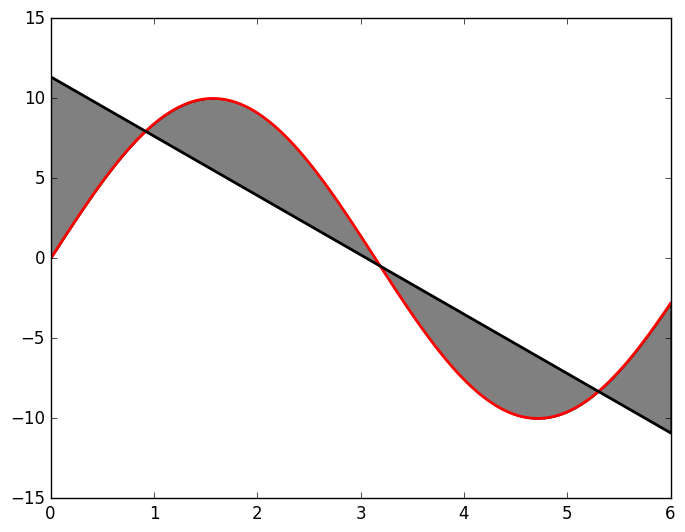

In [269]:
x = linspace(0,6,1000)
y = f(x) 
y_2 = l_avg(x) 
plot(x, y, color="red", linewidth=2.0) # true function
plot(x, y_2, color="black", linewidth=2.0)
fill_between(x, y_2, y, facecolor="grey", interpolate=true);



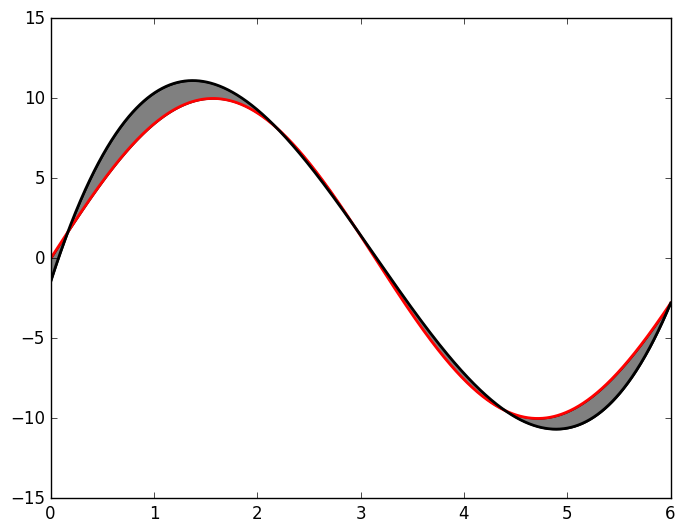

In [270]:
y_3 = c_avg(x)
plot(x, y, color="red", linewidth=2.0) # true function
plot(x, y_3, color="black", linewidth=2.0)
fill_between(x, y_3, y, facecolor="grey", interpolate=true);

Compute the squared bias of the linear and cubic models $\bar {l}(x)$, $\bar{c}(x)$.

In [ ]:
#Pkg.add("SymPy")
#using SymPy

In [272]:
using SymPy # for the integrate function

In [273]:
@show l_avg_w1 
@show l_avg_w2
bias_lfunction(k) = (l_avg_w1 + l_avg_w2 *k - 10*sin(k))^2

l_avg_w1 = 11.354447413681134
l_avg_w2 = -3.7097747322272467


bias_lfunction (generic function with 1 method)

(Any) in module Main at In[271]:3 overwritten at In[273]:3.


In [274]:
l_bias = SymPy.integrate(bias_lfunction,0.0,6.0) /6 # 17.3706674826259


17.3706674826259

In [276]:
@show c_avg_w1
@show c_avg_w2
@show c_avg_w3
@show c_avg_w4 
bias_cfunct(k) = (c_avg_w1 + c_avg_w2 *k + c_avg_w3 * k^2 +c_avg_w4 * k^3  - 10*sin(k))^2
@show c_bias = SymPy.integrate(bias_cfunct,0.0,6.0) / 6 # 0.910945004234340

c_avg_w1 = -1.4457781136375654
c_avg_w2 = 20.186728586195922
c_avg_w3 = -9.413510409424337
c_avg_w4 = 1.0019677241878022


.


c_bias = SymPy.integrate(bias_cfunct,0.0,6.0) / 6 = 0.910945004234340


0.910945004234340

Which model has smaller bias?

Cubic model has smaller bias.

# f)

Next compute the variance of the linear model.

In [277]:
g(k) = sum((l_w[i,1]+ l_w[i,2]*k - l_avg_w1-l_avg_w2*k)^2 for i in 1:1000) / num_samples
l_var = integrate(g,0,6) /6
@show l_var; # 9.74675857098413

l_var = 9.74675857098413


9.74675857098413

Compute the variance of the cubic model.

In [278]:
h(k) = sum((c_w[i,1]+ c_w[i,2]*k + c_w[i,3]*k^2 + c_w[i,4]*k^3- c_avg_w1 -c_avg_w2 *k - c_avg_w3*k^2 - c_avg_w4*k^3)^2 for i in 1:1000) / num_samples
c_var = integrate(h,0,6) /6
@show c_var; # 444.4719218762163

c_var = 444.4719218762163


444.4719218762163

 overwritten at In[278]:1.


In [279]:
@show mean(l_w,1)
@show var(l_w,1)
@show mean(c_w,1)
@show var(c_w,1)

mean(l_w,1) = [11.3544 -3.70977]
var(l_w,1) = [25.8925 2.04581]
mean(c_w,1) = [-1.44578 20.1867 -9.41351 1.00197]
var(c_w,1) = [3697.27 1634.84 88.6158 0.64842]


1×4 Array{Float64,2}:
 3697.27  1634.84  88.6158  0.64842

Which model had higher variance? How do you interpret this? Which model has smaller overall error?

The cubic model has a higher variance. Due to the bias-variance tradeoff, the cubic model has a lower bias but larger variance. 
Model error is computed as the noise + bias^2 + variance. From below, the LINEAR model has a smaller overall error since noise is the same for both models. 

In [281]:
@show l_error = l_bias + l_var #  27.1174260536100
@show c_error = c_bias + c_var # 445.382866880451


l_error = l_bias + l_var = 27.1174260536100
c_error = c_bias + c_var = 445.382866880451


445.382866880451

# g)

How do you think your results would depend on the number of points in the data set $\mathcal D$? Feel free to perform an experiment to check. How many points would you need before the opposite model has smaller overall error?

I need 9 points in the data set for the cubic model to have a smaller error.



In [282]:
n = 9

function findn(n)
srand(3)
num_samples = 1000
l_w = zeros(num_samples,2)
c_w = zeros(num_samples,4)

srand(2)
for i in 1:num_samples
    x = 6*rand(n) # n by 1
    y = f(x) + randn(n) # n by 1
    Y = y
    
    # linear
    X = [ones(length(x))  x]
    w = X\Y
    l_w[i,:]=w
    
    # cubic
    X2 = [ones(length(x)) x x.^2 x.^3]
    w2 = X2\Y
   c_w[i,:]=w2
    
end

# linear
l_avg_w1 = mean(l_w,1)[1]
l_avg_w2 = mean(l_w,1)[2]
@show l_avg_w1 l_avg_w2  
l_avg(x) = l_avg_w1+ l_avg_w2*x

# cubic
c_avg_w1 = mean(c_w,1)[1]
c_avg_w2 = mean(c_w,1)[2]
c_avg_w3 = mean(c_w,1)[3]
c_avg_w4 = mean(c_w,1)[4]
#@show c_avg_w1 c_avg_w2 c_avg_w3 c_avg_w4 

c_avg(x) = c_avg_w1 + c_avg_w2*x+ c_avg_w3 * x.^2 + c_avg_w4 * x.^3


# bias
#@show l_avg_w1 
#@show l_avg_w2
bias_lfunction(k) = (l_avg_w1 + l_avg_w2 *k - 10*sin(k))^2
l_bias = SymPy.integrate(bias_lfunction,0.0,6.0) /6 
bias_cfunct(k) = (c_avg_w1 + c_avg_w2 *k + c_avg_w3 * k^2 +c_avg_w4 * k^3  - 10*sin(k))^2
c_bias = SymPy.integrate(bias_cfunct,0.0,6.0) / 6 

# var


g(k) = sum((l_w[i,1]+ l_w[i,2]*k - l_avg_w1-l_avg_w2*k)^2 for i in 1:1000) / num_samples
l_var = integrate(g,0,6) /6
    
@show l_var;

h(k) = sum((c_w[i,1]+ c_w[i,2]*k + c_w[i,3]*k^2 + c_w[i,4]*k^3- c_avg_w1 -c_avg_w2 *k - c_avg_w3*k^2 - c_avg_w4*k^3)^2 for i in 1:1000) / num_samples
c_var = integrate(h,0,6) /6
@show c_var;
        
# error
@show l_error = l_bias + l_var # 23.0156413552693
@show c_error = c_bias + c_var # 11.6950056303215

    return l_error, c_error 
end

findn (generic function with 1 method)

 overwritten at In[282]:4.


l_avg_w1 = 11.354447413681134
l_avg_w2 = -3.7097747322272467
l_var = 9.74675857098413
c_var = 444.4719218762163
l_error = l_bias + l_var = 27.1174260536100
c_error = c_bias + c_var = 445.382866880451
l_avg_w1 = 11.306375715967004
l_avg_w2 = -3.6944494959052654
l_var = 7.07408479988273
c_var = 70.90329043479986
l_error = l_bias + l_var = 24.4183512053056
c_error = c_bias + c_var = 71.3862663250488
l_avg_w1 = 11.003948974584452
l_avg_w2 = -3.614097043611094
l_var = 5.800907507943182
c_var = 11.244562556670495
l_error = l_bias + l_var = 23.0178188285420
c_error = c_bias + c_var = 11.6920990270587
l_avg_w1 = 10.915284343723904
l_avg_w2 = -3.571522771286089
l_var = 5.362679304158717
c_var = 12.46093018090729
l_error = l_bias + l_var = 22.5449723728760
c_error = c_bias + c_var = 12.9753508149912
l_avg_w1 = 10.911528443768058
l_avg_w2 = -3.578931209298805
l_var = 4.524846444465628
c_var = 4.070458762593973
l_error = l_bias + l_var = 21.7076372353781
c_error = c_bias + c_var = 4.48267176637301

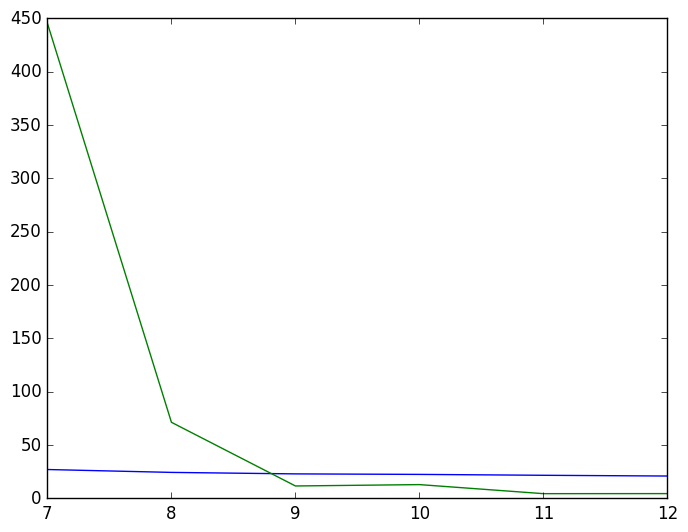

c_var = 4.1335716017495425
l_error = l_bias + l_var = 21.0104104442000
c_error = c_bias + c_var = 4.53891637434838


1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000027A57C18>

In [172]:
# The graphs intersect at about 9. The cubic model does better than the linear model when n = 9.
plot(7:12,[findn(n)[1] for n in 7:12],label = "l_error")
plot(7:12,[findn(n)[2] for n in 7:12],label = "c_error")



# h) Bootstrap

Instead of sampling new data to compute the bias and variance of our model, we could use a bootstrap estimator to get more use out of the few data points we have. Try this for a few different data set sizes and report on your results. How big a data set is needed for the bootstrap to give a reliable estimate of the bias and variance?

If there are 1000 datasets, I need about 11 data points per dataset to give a reliable estimate of the bias and variance.




In [ ]:
K = 1000
num_points = 7

In [196]:
function find_num_points(num_points, K)
l_w = zeros(K,2)
c_w = zeros(K,4)

srand(3)

x = 6*rand(num_points)
y = 10*sin(x)+randn(num_points) 

for k=1:K
    mysample = rand(1:num_points,num_points) # with replacement
    xk, yk = x[mysample], y[mysample]
    
    Xk = [ones(length(xk)) xk]
    wk = Xk\yk
    l_w[k,:] = wk
    
    X2k = [ones(length(xk)) xk xk.^2 xk.^3]
    w2k = X2k\yk
    
    c_w[k,:] = w2k
end

# linear
l_avg_w1 = mean(l_w,1)[1]
l_avg_w2 = mean(l_w,1)[2]
@show l_avg_w1 l_avg_w2  
l_avg(x) = l_avg_w1+ l_avg_w2*x

# cubic
c_avg_w1 = mean(c_w,1)[1]
c_avg_w2 = mean(c_w,1)[2]
c_avg_w3 = mean(c_w,1)[3]
c_avg_w4 = mean(c_w,1)[4]
@show c_avg_w1 c_avg_w2 c_avg_w3 c_avg_w4 

c_avg(x) = c_avg_w1 + c_avg_w2*x+ c_avg_w3 * x.^2 + c_avg_w4 * x.^3

# bias
bias_lfunction(k) = (l_avg_w1 + l_avg_w2 *k - 10*sin(k))^2
l_bias = SymPy.integrate(bias_lfunction,0.0,6.0) /6 
bias_cfunct(k) = (c_avg_w1 + c_avg_w2 *k + c_avg_w3 * k^2 +c_avg_w4 * k^3  - 10*sin(k))^2
c_bias = SymPy.integrate(bias_cfunct,0.0,6.0) / 6 


# var
g(k) = sum((l_w[i,1]+ l_w[i,2]*k - l_avg_w1-l_avg_w2*k)^2 for i in 1:1000) / num_samples
l_var = integrate(g,0,6) /6
    
@show l_var;

h(k) = sum((c_w[i,1]+ c_w[i,2]*k + c_w[i,3]*k^2 + c_w[i,4]*k^3- c_avg_w1 -c_avg_w2 *k - c_avg_w3*k^2 - c_avg_w4*k^3)^2 for i in 1:1000) / num_samples
c_var = integrate(h,0,6) /6
@show c_var;
        
# error
@show l_error = l_bias + l_var # 23.0156413552693
@show c_error = c_bias + c_var # 11.6950056303215
            acc= []
            push!(acc,l_bias)
            push!(acc,l_var)
            push!(acc,c_bias)
            push!(acc,c_var)
            return acc
end

find_num_points (generic function with 2 methods)

 at In[191]:2 overwritten at In[196]:2.


In [243]:
numpointsvector = [find_num_points(n,1000) for n in 10:20]
numpoints=zeros(11,4)
i =1
for i in 1:11
    numpoints[i,1] = numpointsvector[i][1]
    numpoints[i,2] = numpointsvector[i][2]
    numpoints[i,3] = numpointsvector[i][3]
    numpoints[i,4] = numpointsvector[i][4]
    i = i+1
end;

l_avg_w1 = 3.694061956790277
l_avg_w2 = -1.7905848673085647
c_avg_w1 = 9.190170306176151
c_avg_w2 = 6.551676961904564
c_avg_w3 = -5.1335925280665
c_avg_w4 = 0.6170902938145718
l_var = 2.1815295025192296
c_var = 1661.0986958567628
l_error = l_bias + l_var = 30.3069887618523
c_error = c_bias + c_var = 1670.20856669514
l_avg_w1 = 3.907183770736328
l_avg_w2 = -1.7550893795267026
c_avg_w1 = 1.6658056480319758
c_avg_w2 = 15.335624470952661
c_avg_w3 = -7.657469089833379
c_avg_w4 = 0.8267559255626188
l_var = 2.8922091151278893
c_var = 1570.7697836280959
l_error = l_bias + l_var = 30.3562415514274
c_error = c_bias + c_var = 1572.22828640083
l_avg_w1 = 6.240593689316947
l_avg_w2 = -2.222253076362487
c_avg_w1 = -2.3618250786209507
c_avg_w2 = 19.235774006345213
c_avg_w3 = -8.875570525459274
c_avg_w4 = 0.9414013752808565
l_var = 3.3933908070954737
c_var = 8.531153662056516
l_error = l_bias + l_var = 25.0528170780038
c_error = c_bias + c_var = 9.09804476999429
l_avg_w1 = 7.455891401858929
l_avg_w2 =

In [242]:
l_biases = zeros(11)
l_vars = zeros(11)
c_biases = zeros(11)
c_vars = zeros(11)
for i in 1:11
    l_biases[i]=numpoints[i,1]
    l_vars[i]=numpoints[i,2]
    c_biases[i]=numpoints[i,3]
    c_vars[i]=numpoints[i,4]
end
@show l_biases
@show l_vars
@show c_biases
@show c_vars

l_biases = [28.1255,27.464,21.6594,20.484,20.7706,20.9073,20.4378,20.6093,20.9334,20.9501,20.3237]
l_vars = [2.18153,2.89221,3.39339,3.60251,2.7031,2.35505,1.99715,2.03948,1.77333,2.05007,1.63587]
c_biases = [9.10987,1.4585,0.566891,0.451185,0.706577,0.386275,0.623314,0.364591,0.473613,0.367374,0.473599]
c_vars = [1661.1,1570.77,8.53115,2.89886,9.49159,0.443005,0.417126,0.360763,0.474074,0.311203,0.376926]


11-element Array{Float64,1}:
 1661.1     
 1570.77    
    8.53115 
    2.89886 
    9.49159 
    0.443005
    0.417126
    0.360763
    0.474074
    0.311203
    0.376926

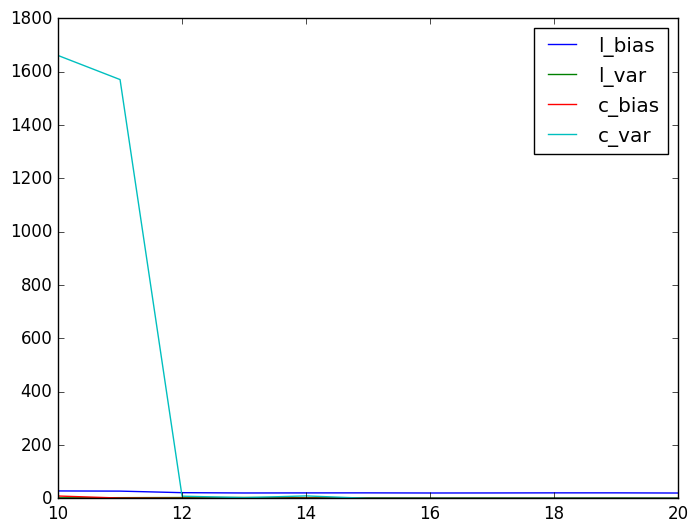

PyObject <matplotlib.legend.Legend object at 0x000000001FB82FD0>

In [234]:
plot(10:20,l_biases,label = "l_bias")
plot(10:20,l_vars,label = "l_var")
plot(10:20,c_biases,label = "c_bias")
plot(10:20,c_vars,label = "c_var")
legend()


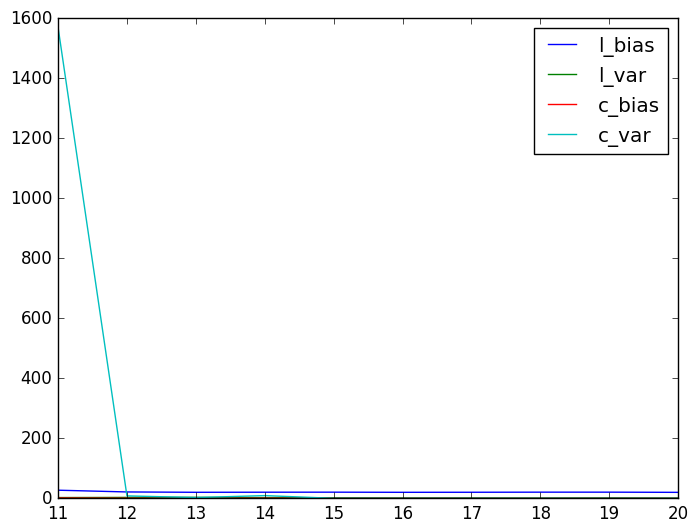

PyObject <matplotlib.legend.Legend object at 0x00000000280577B8>

In [239]:
plot(11:20,l_biases[2:end],label = "l_bias")
plot(11:20,l_vars[2:end],label = "l_var")
plot(11:20,c_biases[2:end],label = "c_bias")
plot(11:20,c_vars[2:end],label = "c_var")
legend()

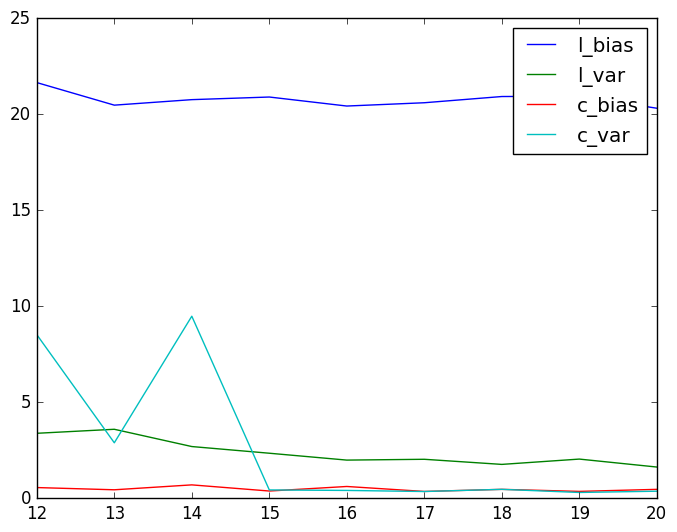

PyObject <matplotlib.legend.Legend object at 0x000000002E936F98>

In [240]:
plot(12:20,l_biases[3:end],label = "l_bias")
plot(12:20,l_vars[3:end],label = "l_var")
plot(12:20,c_biases[3:end],label = "c_bias")
plot(12:20,c_vars[3:end],label = "c_var")
legend()